In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("data/text.csv")

In [3]:
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [4]:
df.shape

(2225, 2)

In [5]:
df['category'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [7]:
df.isnull().sum()

category    0
text        0
dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [9]:
df['category']=encoder.fit_transform(df['category'])


In [10]:
df.head()

,category,text
0,4,tv future in the hands of viewers with home th...
1,0,worldcom boss left books alone former worldc...
2,3,tigers wary of farrell gamble leicester say ...
3,3,yeading face newcastle in fa cup premiership s...
4,1,ocean s twelve raids box office ocean s twelve...


In [11]:
df['category'].value_counts()

3    511
0    510
2    417
4    401
1    386
Name: category, dtype: int64

In [12]:
df.duplicated().sum()

99

In [13]:
df = df.drop_duplicates(keep = "first")

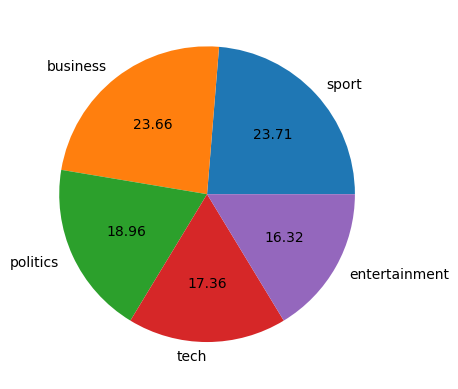

In [14]:

plt.pie(df['category'].value_counts(),labels = ['sport','business','politics','tech','entertainment'],autopct="%0.2f")
plt.show()

In [15]:
import nltk


In [16]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string
ps= PorterStemmer()

In [17]:
def text_transform(text):
    text= text.lower()
    text = nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
        
    
    return " ".join(y)

In [18]:
text_transform("Today we are going to analyse different text classification algorithms")

'today go analys differ text classif algorithm'

In [19]:
df['transformed text']=df['text'].apply(text_transform)

In [20]:
df.head()

,category,text,transformed text
0,4,tv future in the hands of viewers with home th...,tv futur hand viewer home theatr system plasma...
1,0,worldcom boss left books alone former worldc...,worldcom boss left book alon former worldcom b...
2,3,tigers wary of farrell gamble leicester say ...,tiger wari farrel gambl leicest say rush make ...
3,3,yeading face newcastle in fa cup premiership s...,yead face newcastl fa cup premiership side new...
4,1,ocean s twelve raids box office ocean s twelve...,ocean twelv raid box offic ocean twelv crime c...


In [21]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='black')

In [26]:
business_wc = wc.generate(df[df['category']==0]['transformed text'].str.cat(sep=" "))



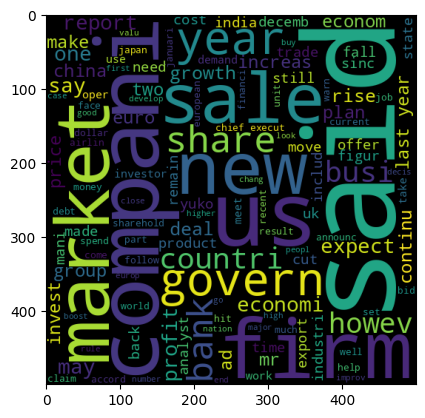

In [27]:
plt.imshow(business_wc)

In [28]:
entertainment_wc = wc.generate(df[df['category']==1]['transformed text'].str.cat(sep=" "))


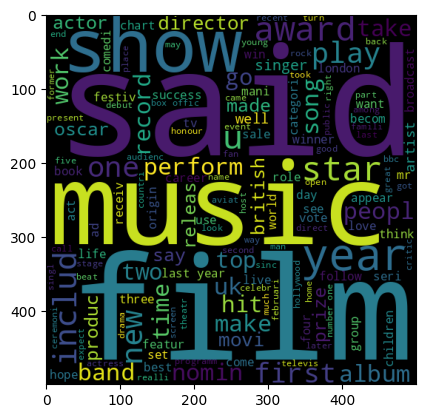

In [30]:
plt.imshow(entertainment_wc)

In [31]:
politics_wc = wc.generate(df[df['category']==2]['transformed text'].str.cat(sep=" "))


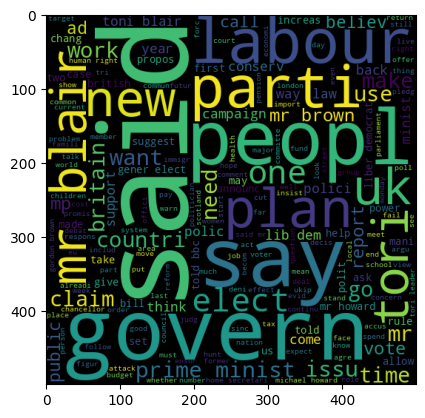

In [32]:
plt.imshow(politics_wc)

In [33]:
sports_wc = wc.generate(df[df['category']==3]['transformed text'].str.cat(sep=" "))


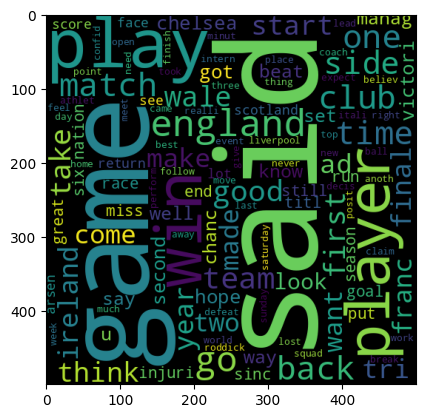

In [34]:
plt.imshow(sports_wc)

In [35]:
tech_wc = wc.generate(df[df['category']==4]['transformed text'].str.cat(sep=" "))

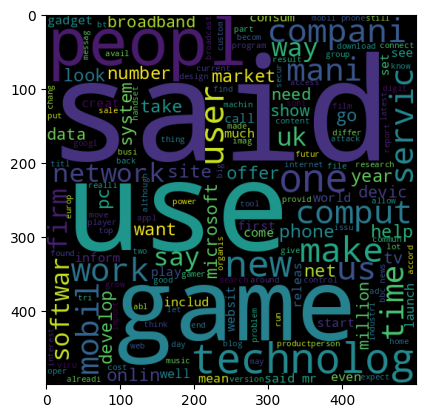

In [36]:
plt.imshow(tech_wc)

In [37]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [39]:
X= tfidf.fit_transform(df['transformed text']).toarray()
y= df['category'].values

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [50]:
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb = GaussianNB()
bnb= BernoulliNB()
mnb= MultinomialNB()

In [55]:
gnb.fit(X_train,y_train)
y_pred1= gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1, average = 'weighted'))

0.9107981220657277
[[ 80   3   5   1   7]
 [  0  61   2   0   5]
 [  4   3  76   0   0]
 [  0   1   0 107   1]
 [  4   1   1   0  64]]
0.9123391228157507


In [56]:
mnb.fit(X_train,y_train)
y_pred2= mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2, average = 'weighted'))

0.971830985915493
[[ 94   0   1   0   1]
 [  0  66   2   0   0]
 [  3   0  79   1   0]
 [  0   0   0 109   0]
 [  1   1   1   1  66]]
0.9719670591468543


In [57]:
bnb.fit(X_train,y_train)
y_pred3= bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3, average = 'weighted'))

0.9624413145539906
[[ 93   0   1   0   2]
 [  0  67   0   0   1]
 [  1   2  80   0   0]
 [  0   0   0 109   0]
 [  5   3   1   0  61]]
0.9628027129476374


# Multinomial Naive Bayes gives the best accuracy